In [1]:
a=1

1

In [2]:
using Gadfly

In [3]:
equation(d) = -7.65 * sind(d) + 9.87 * sind((2 * d) + 206)

equation (generic function with 1 method)

In [4]:
using Dates 
days = collect(DateTime(2015,1,1, 0,0,0):DateTime(2015,12,31,0,0,0)); # an array of 365 datetimes
eq_values = Array{Float64}(0);
for day in days
   push!(eq_values, equation(Dates.datetime2julian(day)))
end

In [5]:
length(eq_values)

365

In [6]:
print (eq_values)

[-12.489158318633294,-12.706091211793332,-12.91044243001373,-13.102073570918481,-13.280860812922018,-13.44669503268585,-13.599481904957052,-13.73914198467703,-13.865610771270589,-13.978838755046784,-14.078791445664887,-14.1654493826405,-14.238808127888536,-14.29887824032177,-14.345685232545158,-14.37926950970806,-14.399686290597998,-14.407005511081064,-14.401311710015648,-14.38270389778718,-14.351295407632803,-14.307213729945595,-14.25060032976868,-14.181610447709836,-14.100412884527298,-14.007189769657202,-13.902136313972585,-13.785460547082838,-13.65738303950127,-13.518136610026708,-13.367966018702925,-13.207127645737067,-13.03588915677528,-12.854529154950143,-12.663336820130471,-12.462611535819521,-12.252662504162497,-12.03380834953855,-11.806376711226271,-11.570703825644742,-11.32713409868482,-11.076019668657137,-10.817719960394689,-10.552601231058313,-10.28103610820348,-10.0034031206759,-9.720086222912121,-9.431474313229113,-9.137960746693922,-8.839942843171015,-8.537821391150484,

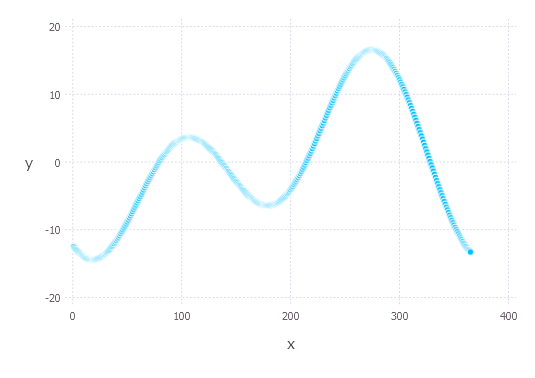

In [7]:
plot1 = Gadfly.plot(
   x = 1:length(days), # the x-axis from 1 to 365
   y = eq_values       # the y-axis for the values of the equation of time   
   )

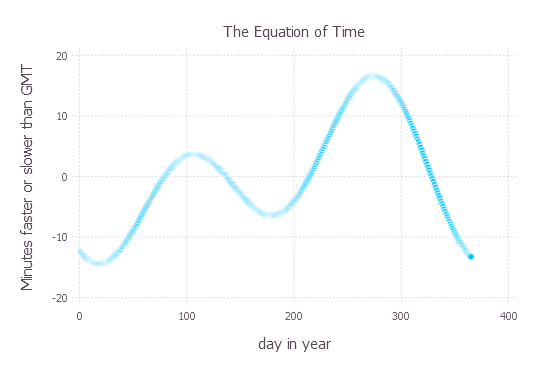

In [8]:
plot2 = Gadfly.plot(
   x=1:length(days),
   y=eq_values,
   Guide.ylabel("Minutes faster or slower than GMT"), # label for y-axis
   Guide.xlabel("day in year"),  # label for x-axis
   Guide.title("The Equation of Time")  # a title
)

In [9]:
datestrings = Dates.format(days, DateFormat("u dd"))

365-element Array{Any,1}:
 "Jan 01"
 "Jan 02"
 "Jan 03"
 "Jan 04"
 "Jan 05"
 "Jan 06"
 "Jan 07"
 "Jan 08"
 "Jan 09"
 "Jan 10"
 "Jan 11"
 "Jan 12"
 "Jan 13"
 ⋮       
 "Dec 20"
 "Dec 21"
 "Dec 22"
 "Dec 23"
 "Dec 24"
 "Dec 25"
 "Dec 26"
 "Dec 27"
 "Dec 28"
 "Dec 29"
 "Dec 30"
 "Dec 31"

 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 1

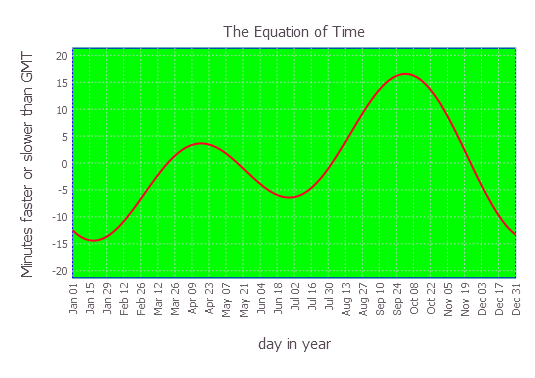


 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[10], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[10], in expression s

In [10]:
plot3 = Gadfly.plot(
   x=datestrings,                                     # use dates for x
   y=eq_values,                                       # equation values
   Guide.xticks(
      ticks=[1:14:365],                               # show 1 in 14 ticks
      orientation=:vertical                           # rotate to vertical
      ),
   Guide.yticks(
      ticks=[-20:5:20]                                # show labels and ticks for every 5 seconds  
      ),
   Guide.ylabel("Minutes faster or slower than GMT"), # label for y-axis
   Guide.xlabel("day in year"),                       # label for x-axis
   Guide.title("The Equation of Time"),               # title
   Geom.line,                                         # line rather than point
   Theme(
     default_color=color("#FF0022"),                  # color of plot line
     default_point_size=3pt,                          # text size
     panel_fill=color("#00FF00"),                     # background color of plot
     panel_stroke=color("Blue"),                      # edge of plot
     line_width=2px                                   # width of line
     )
   )

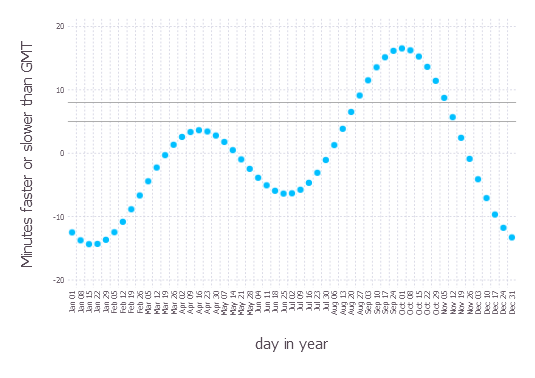

In [11]:
plot4 = Gadfly.plot(
 x=datestrings[1:7:end],                                       # step through every seventh date
 y=eq_values[1:7:end],                                         # step through every seventh value
 Guide.ylabel("Minutes faster or slower than GMT"),
 Guide.xlabel("day in year"),
 Guide.xticks(orientation=:vertical),
 Geom.hline(size=0.25mm, color="darkgray"), yintercept=[5,8],  # thin grey horizontal lines at y = 5 and y = 8
 Geom.point,
 Theme(
     default_point_size=1mm, 
     minor_label_font_size=6pt),
)

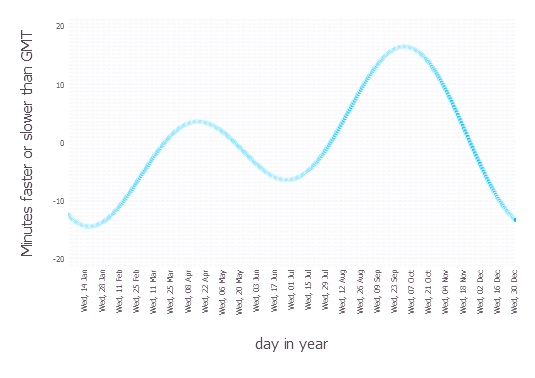

In [12]:
plot5 = Gadfly.plot(
   x=1:length(eq_values),    
   y=eq_values, 
   Theme(default_point_size=2pt, 
         minor_label_font_size=6pt,
         grid_line_width=0.1pt),
   Guide.ylabel("Minutes faster or slower than GMT"),
   Guide.xlabel("day in year"),
   Geom.point,
   Guide.xticks(orientation=:vertical),
   Scale.x_discrete(
         labels=n -> n%14 == 0 ? Dates.format(days[n], DateFormat("e, dd u")) : "")
)

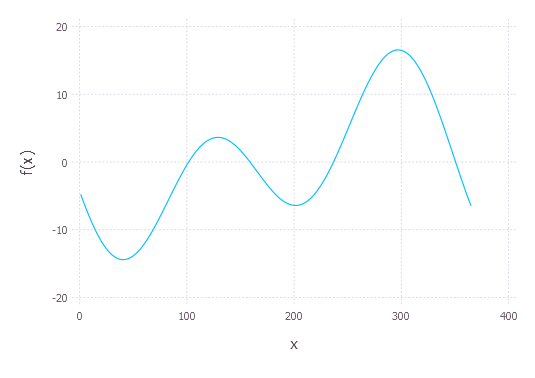

In [13]:
plot6 = Gadfly.plot(equation, 1, 365)

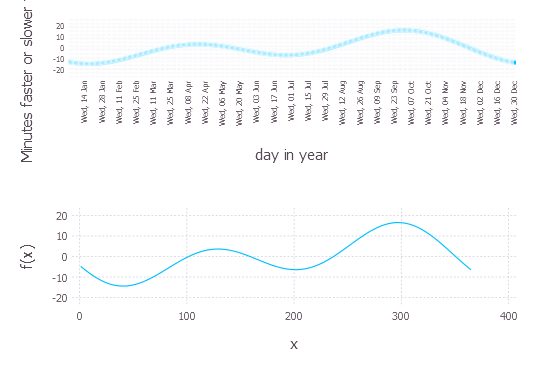

In [14]:
vstack(plot5,plot6)

 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[15], in expression starting on line 1

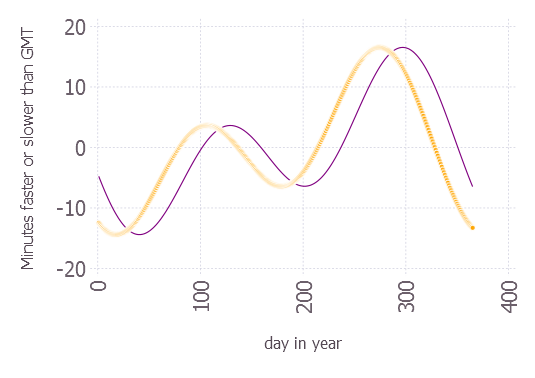


 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[15], in expression starting on line 1


In [15]:
plot7 = Gadfly.plot(
 layer(
   # first layer
   x=1:365,
   y=eq_values,
   Theme(
     default_point_size=2pt, 
     minor_label_font_size=6pt,
     default_color=color("orange")),
   Geom.point), 
 layer(        
  # second layer
   equation, 1, 365),
 Theme(    
 # theme for all layers
   default_point_size=2pt,
   major_label_font_size=12pt,
   minor_label_font_size=16pt, 
   default_color=color("purple")),
 Guide.ylabel("Minutes faster or slower than GMT"),
 Guide.xlabel("day in year"),
 Guide.xticks(orientation=:vertical)
)

 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[16], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[16], in expression starting on line 1


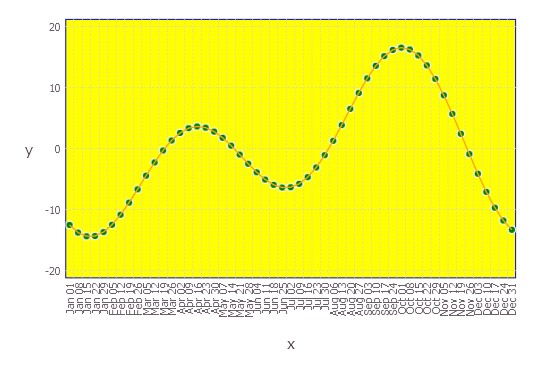

 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[16], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\execute_request.jl:177
 in eventloop at C:\Users\Vladimir Alencar\.julia\v0.4\IJulia\src\IJulia.jl:141
 in anonymous at task.jl:447
while loading In[16], in expression starting on line 1


In [16]:
plot8 = Gadfly.plot(
 # first layer
 layer(
   x=datestrings[1:7:end],
   y=eq_values[1:7:end],  
   Geom.line,
   Theme(
      line_width=1pt,
      default_color=color("orange")
   )
 ),
 # second layer
 layer(
   x=datestrings[1:7:end],
   y=eq_values[1:7:end],
   Geom.point,
   Theme(
      default_point_size=1mm,
      default_color=color("green"))
 ),
  # background 
  Theme(
     panel_fill=color("#FFFF00"),
     panel_opacity=0.1,
     panel_stroke=color("Blue"),
   )
)

In [17]:
for i in 1:8
   println("Saving plot $i")
   draw(PDF(join(["equation-graph-", string(i), ".pdf"]), 16cm, 12cm), eval(symbol("plot" * string(i))))
end

Saving plot 1
Saving plot 2
Saving plot 3
Saving plot 4
Saving plot 5
Saving plot 6
Saving plot 7
Saving plot 8


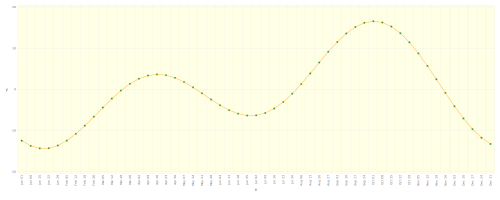

In [18]:
draw(SVG(50cm, 20cm), plot8 )